In [4]:
# These are the standard Data Science Python Libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model

# These are the HTTP requests of Web Pages from Python Libraries 
import requests
from bs4 import BeautifulSoup

# Dictionary Module
from collections import defaultdict

# Python Libraries for graphing/visuals
import matplotlib.pyplot as plt
import statsmodels.api
import statsmodels.formula.api as sm
import seaborn
import folium

In [7]:
# Load our csv file, Electric_Vehicle_Population_Data.csv
file_path = 'Electric_Vehicle_Population_Data.csv'
data_of_ev = pd.read_csv(file_path)

# Rows with missing values will be dropped
data_of_ev_cleaned = data_of_ev.dropna()

# Model Year is a column that should be converted into an integer
data_of_ev_cleaned['Model Year'] = data_of_ev_cleaned['Model Year'].astype(int)

# With this newly cleaned data, we can store it into a new csv file to use later
data_of_ev_cleaned.to_csv('Electric_Vehicle_Population_Data_Cleaned.csv', index=False)

# Now we can get a summary of the statistics
summary_of_stats = data_of_ev_cleaned.describe()

# Counting the number of vehicles based on Make
make_counts = data_of_ev_cleaned['Make'].value_counts()

# This is the number of vehicles for each type of electric vehicle
ev_type_counts = data_of_ev_cleaned['Electric Vehicle Type'].value_counts()

# This is the average range by Make
avg_range_by_make = data_of_ev_cleaned.groupby('Make')['Electric Range'].mean()

# Here are the results
(summary_of_stats, make_counts, ev_type_counts, avg_range_by_make)

/tmp/ipykernel_37691/427605546.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_of_ev_cleaned['Model Year'] = data_of_ev_cleaned['Model Year'].astype(int)


(         Postal Code     Model Year  Electric Range      Base MSRP  \
 count  181055.000000  181055.000000   181055.000000  181055.000000   
 mean    98260.619331    2020.583342       57.809969    1038.141173   
 std       303.618629       2.991069       91.387237    8220.159471   
 min     98001.000000    1997.000000        0.000000       0.000000   
 25%     98052.000000    2019.000000        0.000000       0.000000   
 50%     98122.000000    2022.000000        0.000000       0.000000   
 75%     98371.000000    2023.000000       75.000000       0.000000   
 max     99403.000000    2024.000000      337.000000  845000.000000   
 
        Legislative District  DOL Vehicle ID  2020 Census Tract  
 count         181055.000000    1.810550e+05       1.810550e+05  
 mean              29.107183    2.214370e+08       5.303982e+10  
 std               14.892453    7.528927e+07       1.621873e+07  
 min                1.000000    4.385000e+03       5.300195e+10  
 25%               18.000000 

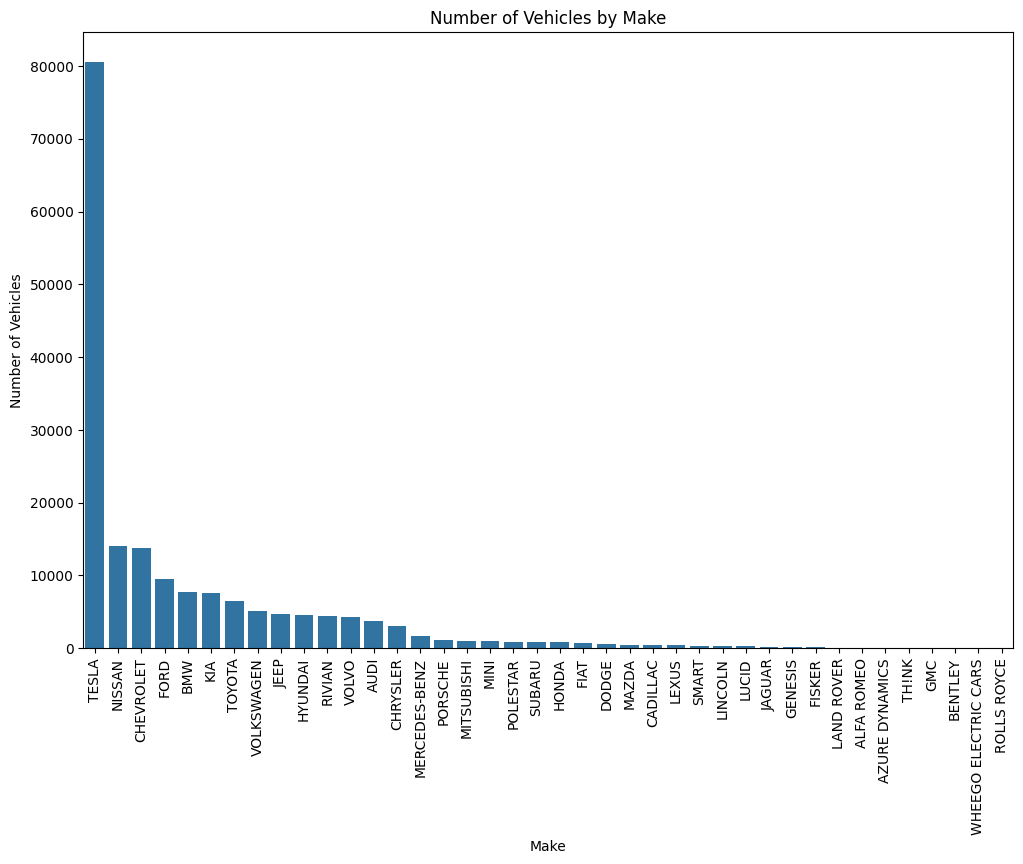

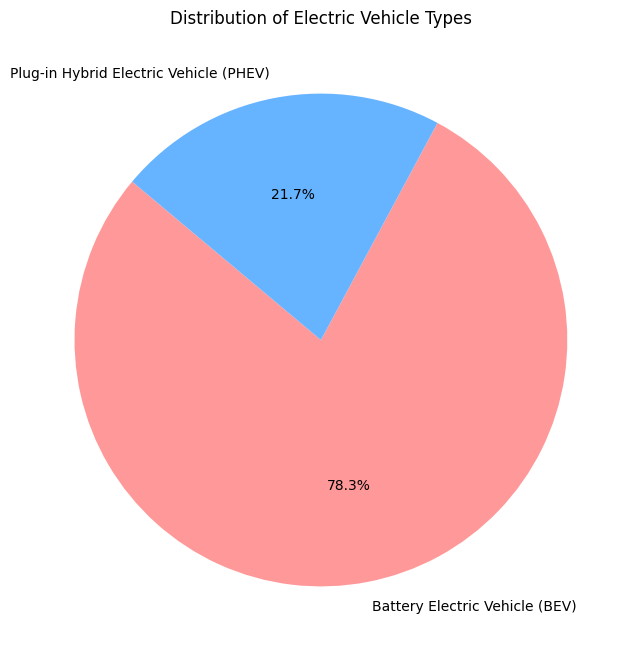

/tmp/ipykernel_37691/4062103350.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=avg_range_by_make.index, y=avg_range_by_make.values, palette='coolwarm')


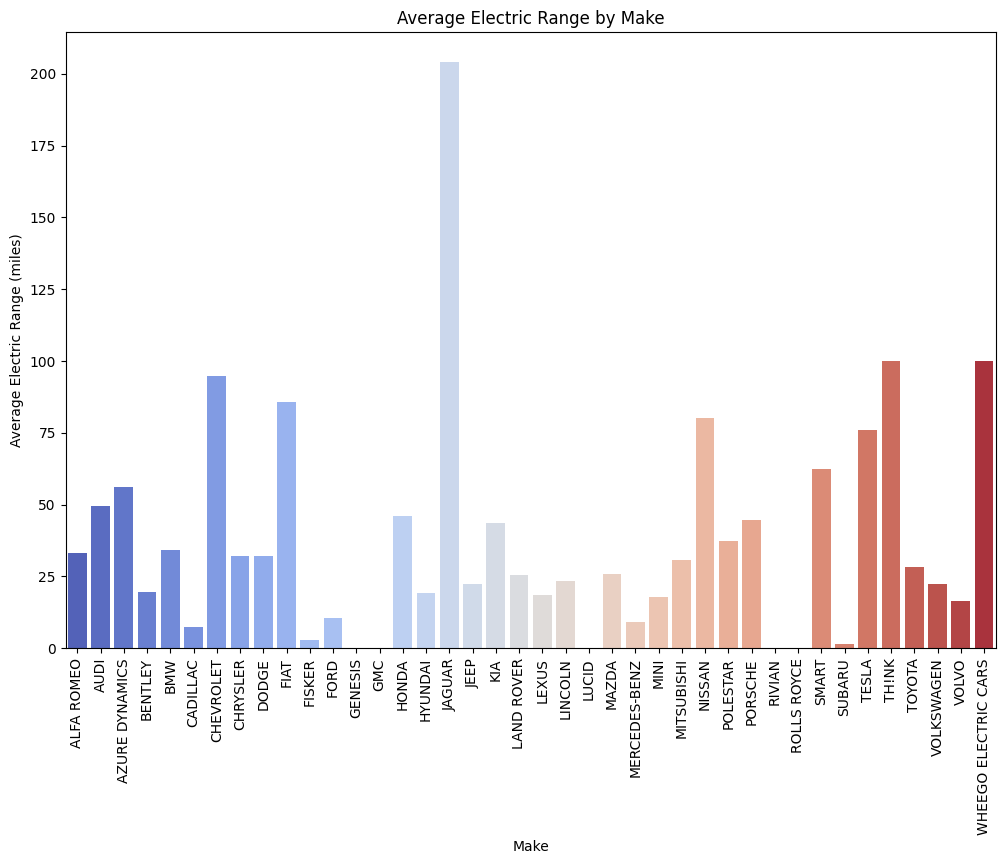

In [8]:
# Plotting the number of vehicles by Make
plt.figure(figsize=(12, 8))
seaborn.barplot(x=make_counts.index, y=make_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Make')
plt.show()

# Plotting the distribution of electric vehicle types
plt.figure(figsize=(8, 8))
ev_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.ylabel('')
plt.title('Distribution of Electric Vehicle Types')
plt.show()

# Plotting the average electric range by Make
plt.figure(figsize=(12, 8))
seaborn.barplot(x=avg_range_by_make.index, y=avg_range_by_make.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Average Electric Range (miles)')
plt.title('Average Electric Range by Make')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Ordinary Least Squares (OLS)
Coefficients: 780.3022248768106
Intercept: -1563987.2654920113
Mean squared error: 288344993.74
Coefficient of determination (R^2): 0.27


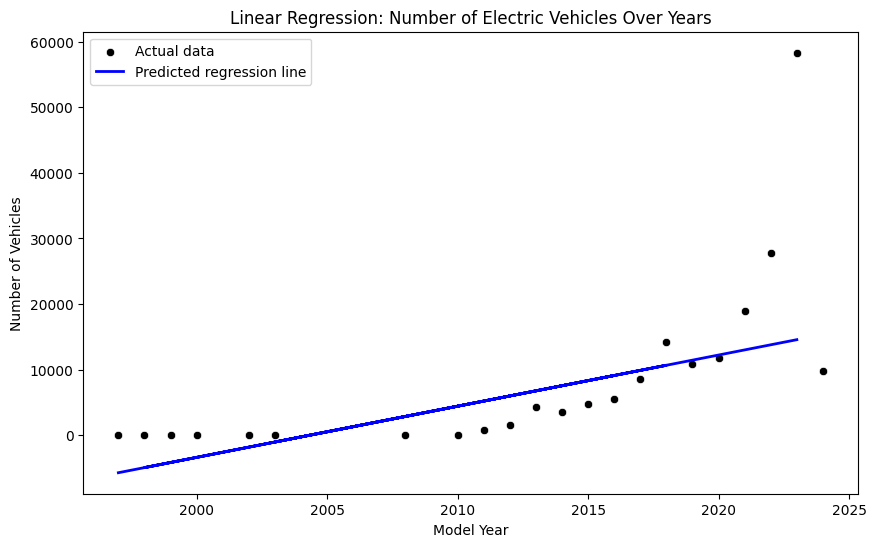

In [15]:
file_path = 'Electric_Vehicle_Population_Data_Cleaned.csv'
data_of_ev = pd.read_csv(file_path)

# Summarizing the data by year to get the number of electric vehicles per year
ev_by_year = data_of_ev.groupby('Model Year').size().reset_index(name='Number of Vehicles')

# organizing the data by model year and number of vehicles to get x and y axis
X = ev_by_year[['Model Year']]
Y = ev_by_year['Number of Vehicles']

# Splitting the data into training/testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model using the training sets above
model.fit(X_train, Y_train)

# Making predictions using the testing set
Y_pred = model.predict(X_test)

print('Ordinary Least Squares (OLS)')
print('Coefficients:', model.coef_[0])
print('Intercept:', model.intercept_)
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))

# Plotting the results
plt.figure(figsize=(10, 6))
seaborn.scatterplot(x='Model Year', y='Number of Vehicles', data=ev_by_year, color='black', label='Actual data')
plt.plot(X_test, Y_pred, color='blue', linewidth=2, label='Predicted regression line')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.title('Linear Regression: Number of Electric Vehicles Over Years')
plt.legend()
plt.show()